In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_paths = [
    "data\Resale Flat Prices (Based on Approval Date), 1990 - 1999.csv",
    "data\Resale Flat Prices (Based on Approval Date), 2000 - Feb 2012.csv",
    "data\Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec 2016.csv",
    "data\Resale Flat Prices (Based on Registration Date), From Mar 2012 to Dec 2014.csv",
    "data\Resale flat prices based on registration date from Jan-2017 onwards.csv"
]

<>:2: SyntaxWarning: invalid escape sequence '\R'
<>:3: SyntaxWarning: invalid escape sequence '\R'
<>:4: SyntaxWarning: invalid escape sequence '\R'
<>:5: SyntaxWarning: invalid escape sequence '\R'
<>:6: SyntaxWarning: invalid escape sequence '\R'
<>:2: SyntaxWarning: invalid escape sequence '\R'
<>:3: SyntaxWarning: invalid escape sequence '\R'
<>:4: SyntaxWarning: invalid escape sequence '\R'
<>:5: SyntaxWarning: invalid escape sequence '\R'
<>:6: SyntaxWarning: invalid escape sequence '\R'
C:\Users\Ansaar\AppData\Local\Temp\ipykernel_19780\163386159.py:2: SyntaxWarning: invalid escape sequence '\R'
  "data\Resale Flat Prices (Based on Approval Date), 1990 - 1999.csv",
C:\Users\Ansaar\AppData\Local\Temp\ipykernel_19780\163386159.py:3: SyntaxWarning: invalid escape sequence '\R'
  "data\Resale Flat Prices (Based on Approval Date), 2000 - Feb 2012.csv",
C:\Users\Ansaar\AppData\Local\Temp\ipykernel_19780\163386159.py:4: SyntaxWarning: invalid escape sequence '\R'
  "data\Resale Flat P

In [3]:
dfs = [pd.read_csv(path) for path in file_paths]
df_all = pd.concat(dfs, ignore_index=True)

In [4]:
df_all.columns = df_all.columns.str.lower().str.replace(" ", "_")

In [5]:
print("Null Values:\n", df_all.isnull().sum())

Null Values:
 month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64


In [6]:
df_all.drop(columns=['block', 'street_name', 'remaining_lease'], inplace=True, errors='ignore')

In [7]:
df_all['month'] = pd.to_datetime(df_all['month'], errors='coerce')

In [8]:
df_all.dropna(subset=['month'], inplace=True)

In [9]:
df_all['year'] = df_all['month'].dt.year
df_all['month_num'] = df_all['month'].dt.month

In [12]:
#  Calculating flat age
df_all['flat_age'] = df_all['year'] - df_all['lease_commence_date']

In [13]:
# Convert storey range to median storey
def get_storey_median(storey_range):
    try:
        low, high = storey_range.split(' TO ')
        return (int(low) + int(high)) / 2
    except:
        return np.nan

df_all['storey_median'] = df_all['storey_range'].map(get_storey_median)

In [14]:
# Drop rows with missing derived values
df_all.dropna(subset=['flat_age', 'storey_median'], inplace=True)

In [15]:
# Confirm final cleaned data
print("\nCleaned Dataset Shape:", df_all.shape)
print("Columns:", df_all.columns.tolist())


Cleaned Dataset Shape: (955041, 12)
Columns: ['month', 'town', 'flat_type', 'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price', 'year', 'month_num', 'flat_age', 'storey_median']


In [16]:
sns.set(style="whitegrid")

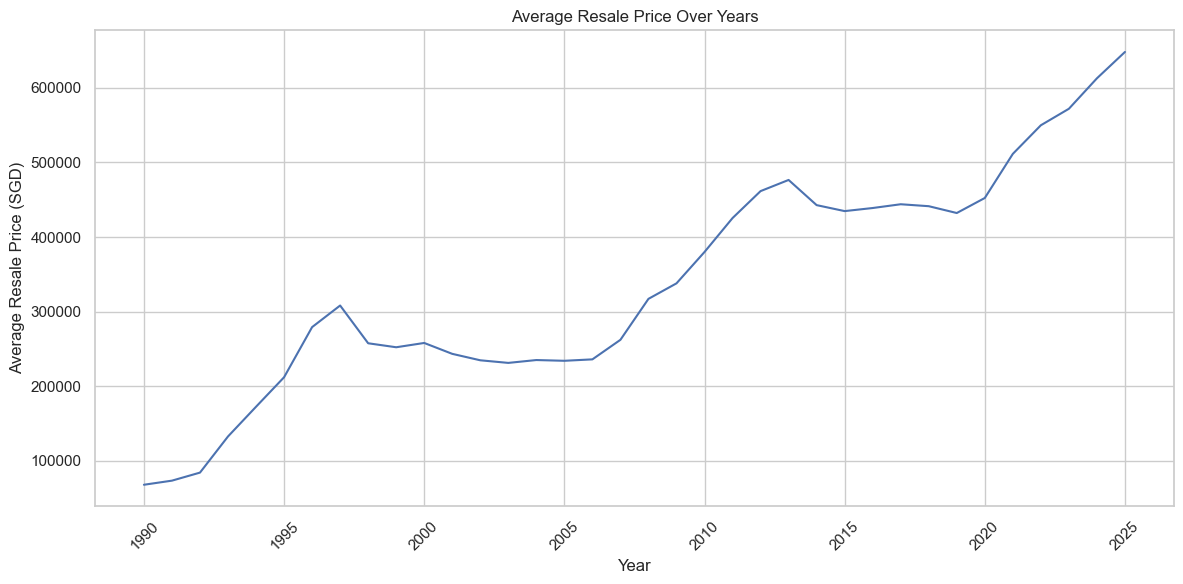

In [17]:
# --- Plot 1: Average Resale Price Over Years ---
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_all.groupby('year')['resale_price'].mean().reset_index(), x='year', y='resale_price')
plt.title("Average Resale Price Over Years")
plt.xlabel("Year")
plt.ylabel("Average Resale Price (SGD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

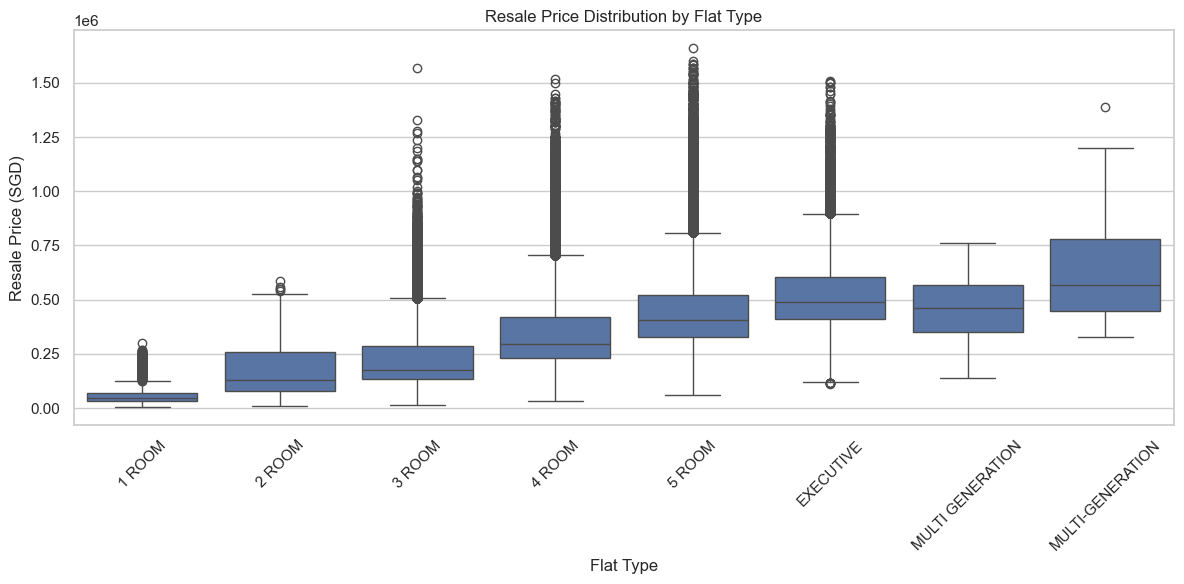

In [18]:
# --- Plot 2: Resale Price Distribution by Flat Type ---
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_all, x='flat_type', y='resale_price', order=sorted(df_all['flat_type'].unique()))
plt.title("Resale Price Distribution by Flat Type")
plt.xlabel("Flat Type")
plt.ylabel("Resale Price (SGD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

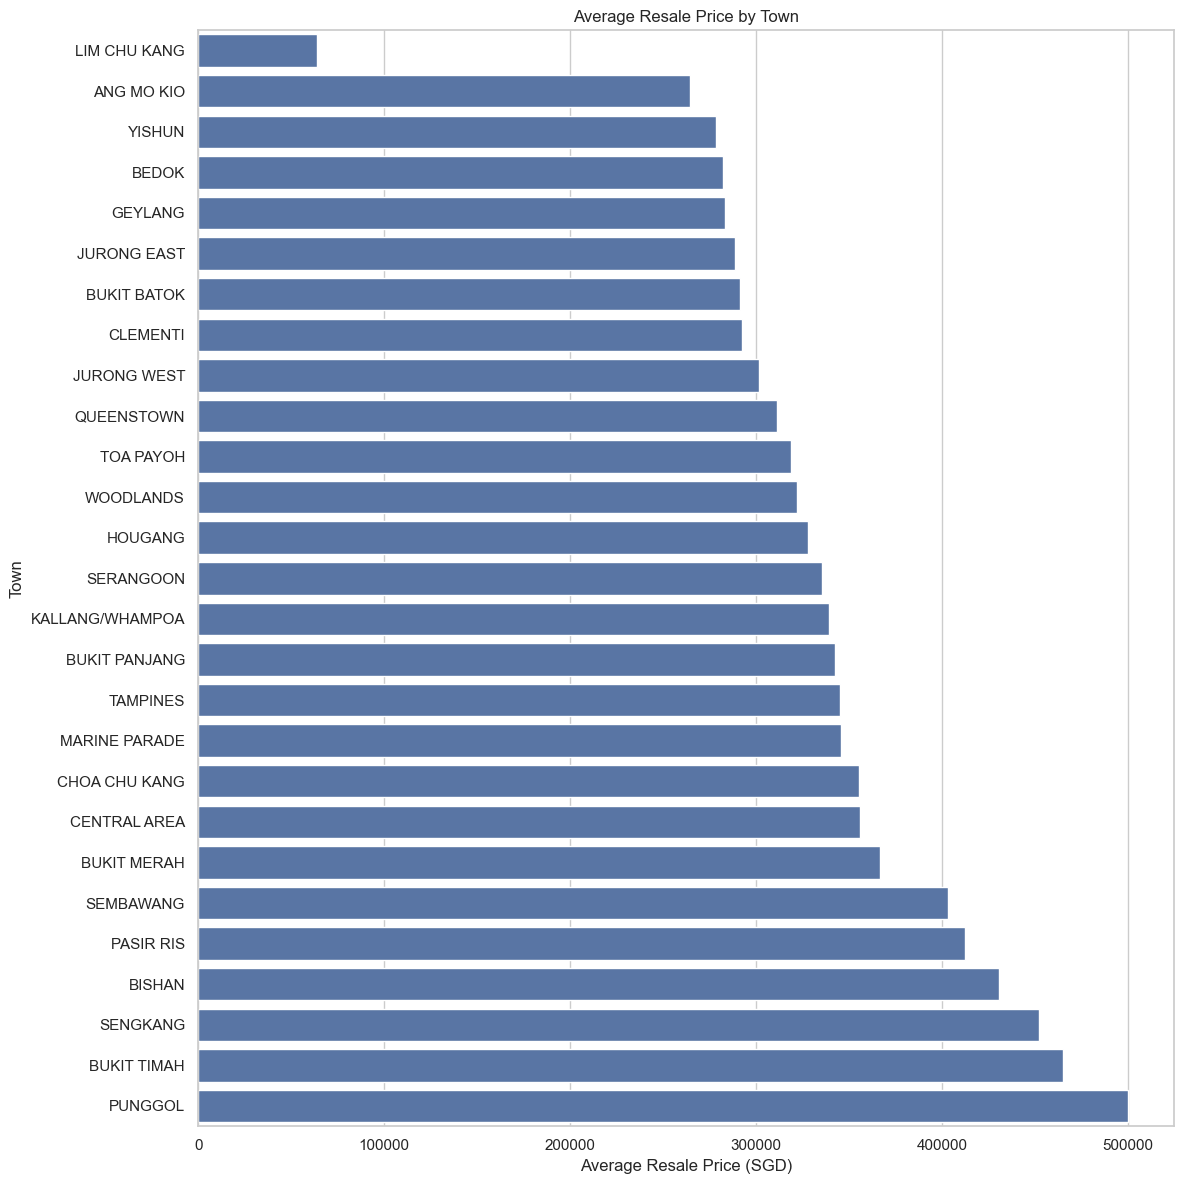

In [19]:
# --- Plot 3: Average Resale Price by Town ---
plt.figure(figsize=(12, 12))
avg_price_by_town = df_all.groupby('town')['resale_price'].mean().sort_values(ascending=True)
sns.barplot(x=avg_price_by_town.values, y=avg_price_by_town.index)
plt.title("Average Resale Price by Town")
plt.xlabel("Average Resale Price (SGD)")
plt.ylabel("Town")
plt.tight_layout()
plt.show()

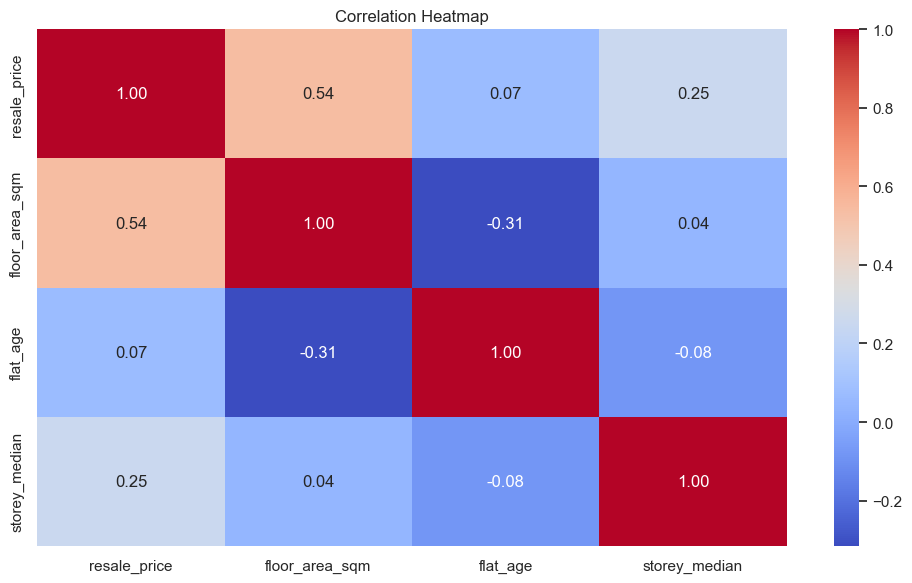

In [20]:
# --- Plot 4: Correlation Heatmap ---
plt.figure(figsize=(10, 6))
corr_matrix = df_all[['resale_price', 'floor_area_sqm', 'flat_age', 'storey_median']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

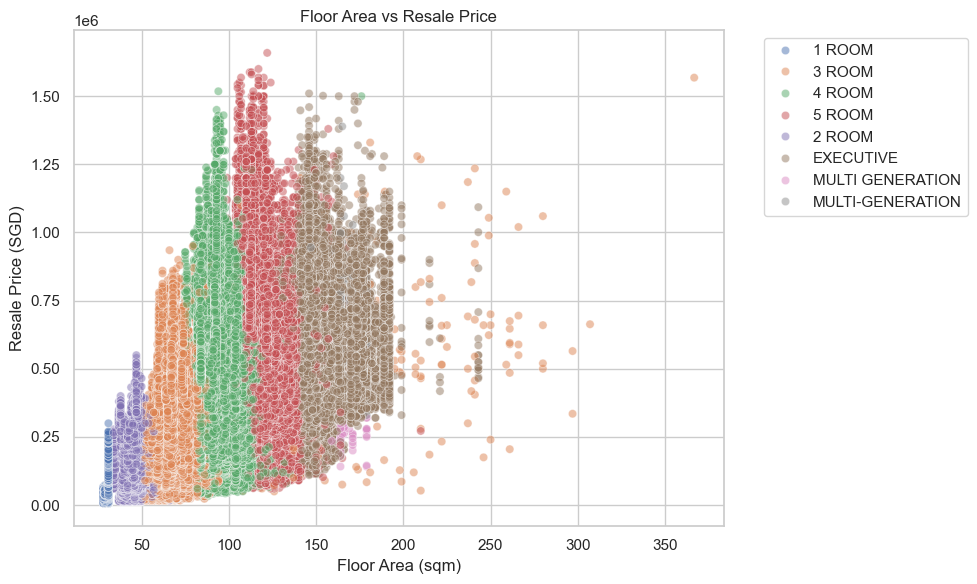

In [21]:
# --- Plot 5: Scatter Plot - Floor Area vs Resale Price ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_all, x='floor_area_sqm', y='resale_price', hue='flat_type', alpha=0.5)
plt.title("Floor Area vs Resale Price")
plt.xlabel("Floor Area (sqm)")
plt.ylabel("Resale Price (SGD)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Step 1: Import ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [24]:
#  Step 2: Encode Categorical Features
cat_features = ['town', 'flat_type', 'flat_model']
df_encoded = pd.get_dummies(df_all, columns=cat_features, drop_first=True)

In [25]:
# Step 3: Define X and y
features = ['floor_area_sqm', 'flat_age', 'storey_median'] + [col for col in df_encoded.columns if any(cat in col for cat in cat_features)]
X = df_encoded[features]
y = df_encoded['resale_price']

In [26]:
# Step 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

In [28]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [29]:
# XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

In [30]:
# Step 6: Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"\n📌 {name}")
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("MSE :", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R²  :", r2_score(y_true, y_pred))

In [31]:
# Step 7: Compare All Models
evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("XGBoost", y_test, xgb_preds)


📌 Linear Regression
MAE : 79938.11061779122
MSE : 11668589927.036695
RMSE: 108021.24757211747
R²  : 0.6371628814420935

📌 Random Forest
MAE : 33951.262898242
MSE : 2837659743.268305
RMSE: 53269.688785164726
R²  : 0.9117624073574145

📌 XGBoost
MAE : 54583.56108889667
MSE : 5638243367.189018
RMSE: 75088.23720922618
R²  : 0.8246777040009816


In [32]:
#  Step 1: Import joblib
import joblib

#  Step 2: Save the best model (XGBoost in this case)
joblib.dump(xgb_model, 'xgb_resale_model.pkl')

#  Optionally: Save feature columns
joblib.dump(features, 'model_features.pkl')

print("XGBoost model and features saved as 'xgb_resale_model.pkl' and 'model_features.pkl'")


XGBoost model and features saved as 'xgb_resale_model.pkl' and 'model_features.pkl'
